In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 处理图与图之间的间距

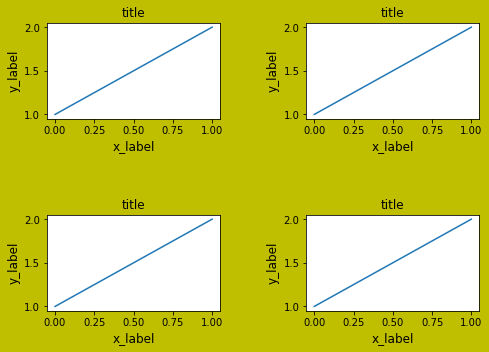

In [6]:

def auto_plot(axe, fontsize=12):
    axe.plot([1,2])
    axe.set_title("title",fontsize=fontsize)
    axe.set_xlabel("x_label",fontsize=fontsize)
    axe.set_ylabel("y_label",fontsize=fontsize)

fig, axes = plt.subplots(2,2)
fig.set_facecolor("y")
for i in range(2):
    for j in range(2):
        auto_plot(axes[i,j])
#fig.tight_layout()
fig.tight_layout(w_pad=5,h_pad=5)
#fig.subplots_adjust(left, bottom, right, top, wspace, hspace)
fig.subplots_adjust(0,0,1,1,wspace=0.5,hspace=1)

## subplot布局方法

<AxesSubplot:>

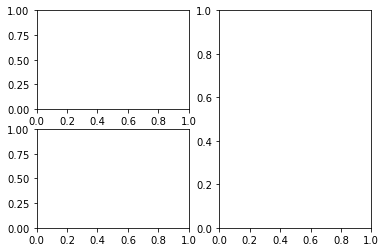

In [7]:
plt.subplot(221)
plt.subplot(223)
plt.subplot(122)

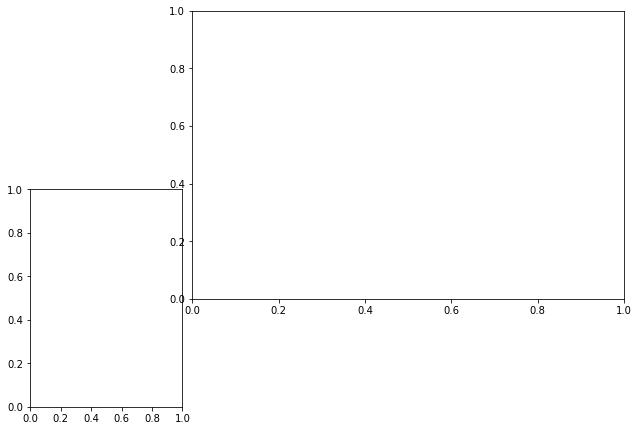

In [31]:
# axe创建好了也可以用set_position改变位置
fig,axes = plt.subplots(1,2)
axes[1].set_position([0.5,0.5,1,1])

## gridspec布局方法

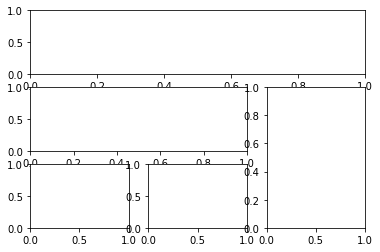

In [18]:
fig = plt.figure()
gs = fig.add_gridspec(3,3)
p1 = fig.add_subplot(gs[0,0:3])
p2 = fig.add_subplot(gs[1,0:2])
p3 = fig.add_subplot(gs[2,0])
p4 = fig.add_subplot(gs[2,1])
p5 = fig.add_subplot(gs[1:3,2])

### gridspec还可以调整网格长宽比

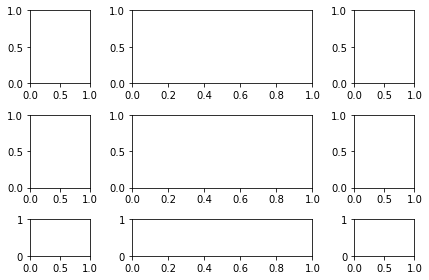

In [25]:
width_ratios = (1,3,1)
height_ratios = (2,2,1)
fig = plt.figure()
gs = fig.add_gridspec(3,3,width_ratios=width_ratios,height_ratios=height_ratios)
for row in range(0,3):
    for col in range(0,3):
        fig.add_subplot(gs[row,col])
fig.tight_layout()

## 实例

In [34]:
athletes = pd.read_csv("athlete_events.csv")[:4000].dropna()
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


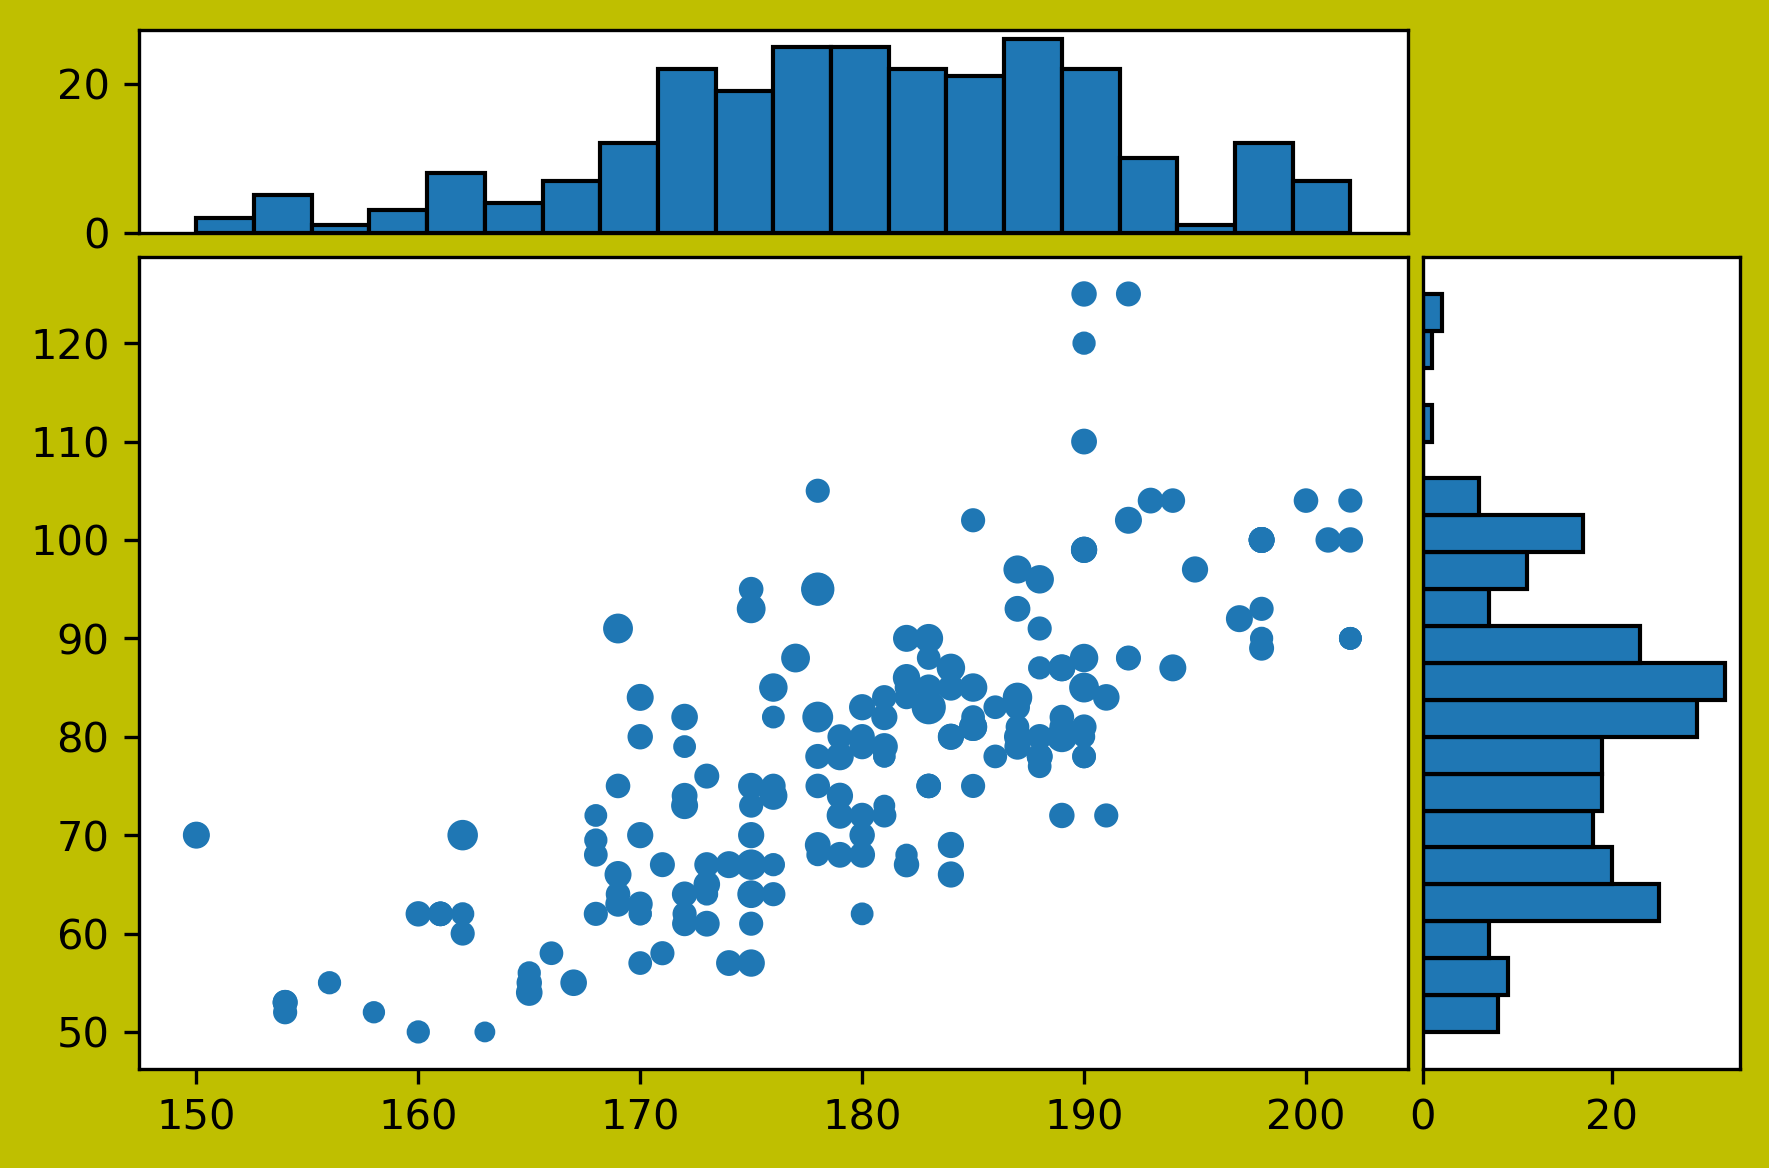

In [73]:
man_athletes = athletes[athletes["Sex"]=="M"][["Height","Weight","Age"]]
# 创建figure
fig = plt.figure(facecolor = "y", dpi = 300)
# 布局
gs = fig.add_gridspec(2,2,width_ratios=(4,1),height_ratios=(1,4))
# 画图(1,0)
ax1 = fig.add_subplot(gs[1,0])
ax1.scatter(x="Height",y="Weight",data=man_athletes,s="Age")
# 画图(1,1)
ax2 = fig.add_subplot(gs[1,1])
ax2.hist(man_athletes["Weight"],20,orientation="horizontal",edgecolor="k")
# 画图(1,0)
ax3 = fig.add_subplot(gs[0,0])
ax3.hist(man_athletes["Height"],20,orientation="vertical",edgecolor="k")
# 调整
ax2.yaxis.set_visible(False)
ax3.xaxis.set_visible(False)
#调整间距
fig.tight_layout(h_pad=0,w_pad=0)

# # 笔记：
1. 调整布局：
    * fig.tight_layout(w_pad,h_pad)：这个函数不传任何参数都可以实现避免元素的重叠。w_pad是用来控制水平方向的间距，h_pad用来控制垂直方向的间距。
    * fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=None)：这个函数不会自动的调整布局，而是通过参数来实现。

2. 自定义布局：
    * 简单的：直接通过subplot方法就可以实现了。
    * 复杂的：通过GridSpec对象来实现，创建GridSpec的方法为`fig.add_gridspec(rows,cols,width_ratios,height_ratios)`